<a href="https://colab.research.google.com/github/shumyyla/ML_assignment1/blob/main/Assignment1_ML_MSDSF22M016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MSDSF22M016 Shumaila Zahid**
### **Machine Learning**
### **Assignment 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#**Brief description of the data set and a summary of its attributes**

##**Step 1: Loading Data** 

In [235]:
#loading data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/salary.csv',na_values=[' ?' ])

##**Step 2: Displaying Data**
Displaying the dataset


In [209]:
df

,sl_no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##**Step 3: Review the data set structure and data types**

---
features workclass, occupation, native-country has null values



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sl_no           32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      30718 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  31978 non-null  object
 15  salary          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


##**Step 4: Finding the features of data**
Displaying the features in dataset


In [30]:
df.columns

Index(['sl_no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

##**Step 5: Finding the total number of records in data set**

In [39]:
df.shape[0] #total no. of records

32561

##**Step 6: Finding distribution of each feature**
---


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


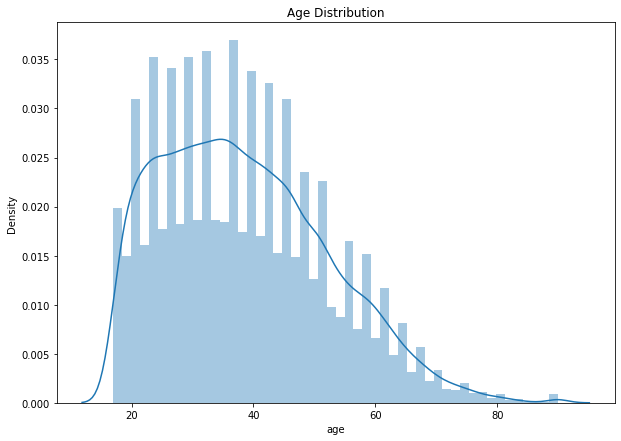

In [72]:
#plotting a distribution plot using the Seaborn library. The plot displays the distribution of ages in the dataset.
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


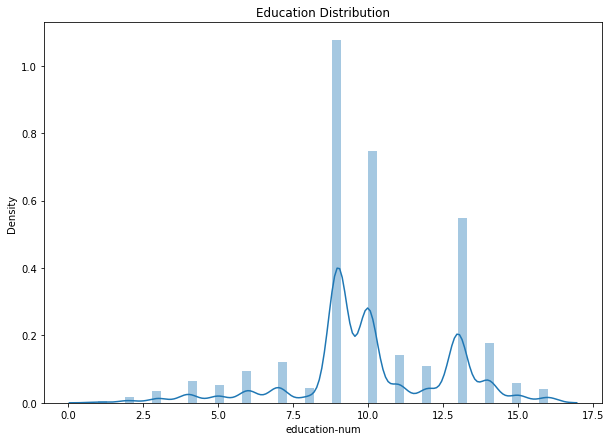

In [73]:
#The plot displays the distribution of education in the dataset.
plt.figure(figsize=(10,7))
sns.distplot(df['education-num'])
plt.title('Education Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


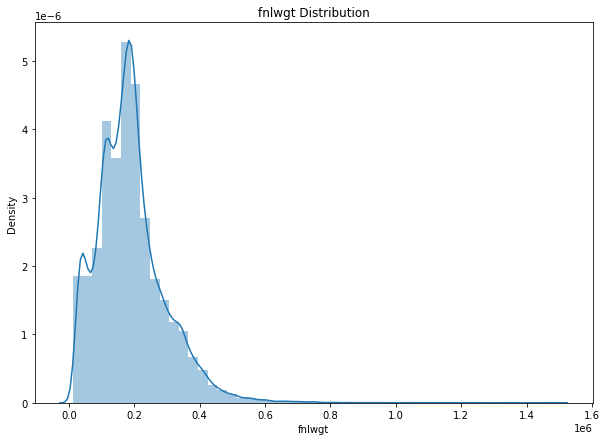

In [74]:
#The plot displays the distribution of fnlwgt in the dataset.
plt.figure(figsize=(10,7))
sns.distplot(df['fnlwgt'])
plt.title('fnlwgt Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


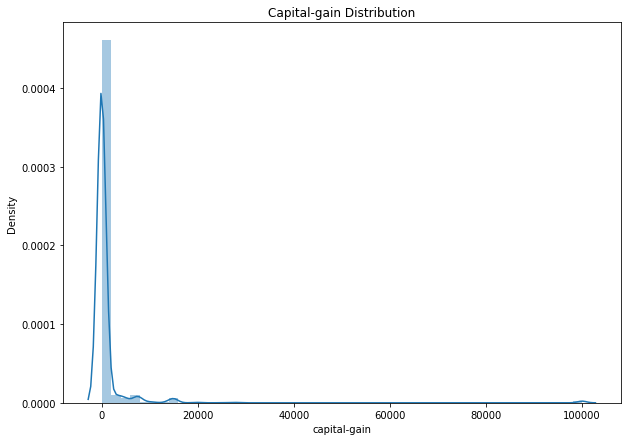

In [76]:
#The plot displays the distribution of capital-gain in the dataset.
plt.figure(figsize=(10,7))
sns.distplot(df['capital-gain'])
plt.title('Capital-gain Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


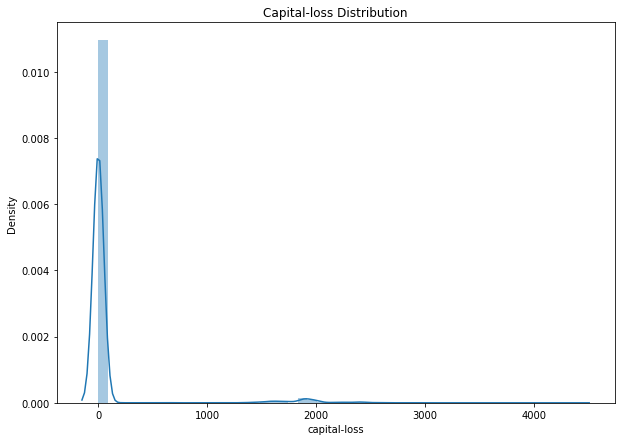

In [77]:
#The plot displays the distribution of capital-loss in the dataset.

plt.figure(figsize=(10,7))
sns.distplot(df['capital-loss'])
plt.title('Capital-loss Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


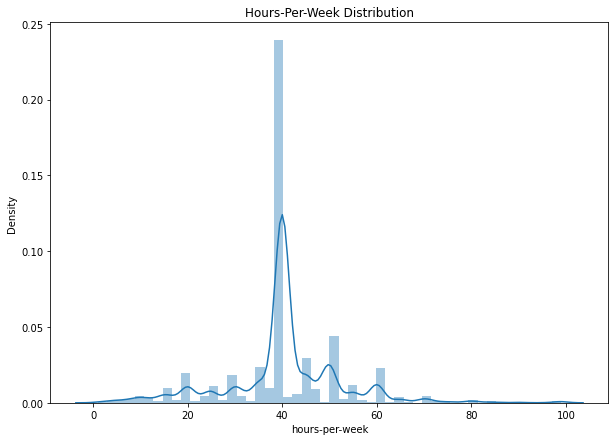

In [107]:
#The plot displays the distribution of hours per week in the dataset.

plt.figure(figsize=(10,7))
sns.distplot(df['hours-per-week'])
plt.title('Hours-Per-Week Distribution')
plt.show()

##**Step 7: Checking the unique values different features**

In [99]:
pd.DataFrame({'Columns': df.nunique().index , 'Number of unique values':  df.nunique().values}) #displaying unique values in every feature

,Columns,Number of unique values
0,sl_no,32561
1,age,73
2,workclass,8
3,fnlwgt,21648
4,education,16
5,education-num,16
6,marital-status,7
7,occupation,14
8,relationship,6
9,race,5


##**Step 8: Finding distribution of categorical features**

Text(0.5, 1.0, 'Salaries ratio for all persons')

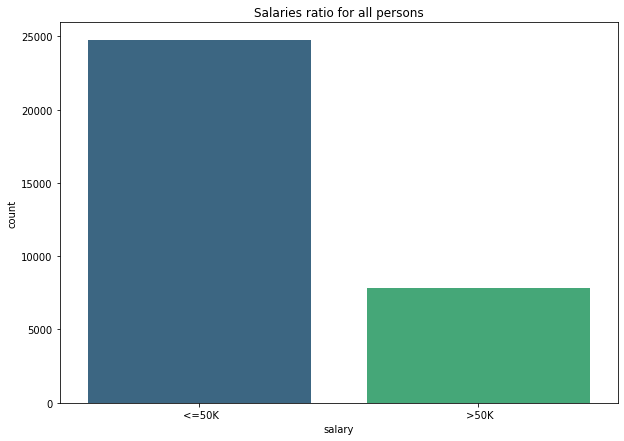

In [79]:
#A plot that displays the distribution of salaries for all persons in the dataset.
plt.figure(figsize=(10,7))
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')


Text(0.5, 1.0, 'workclass ratio for all persons')

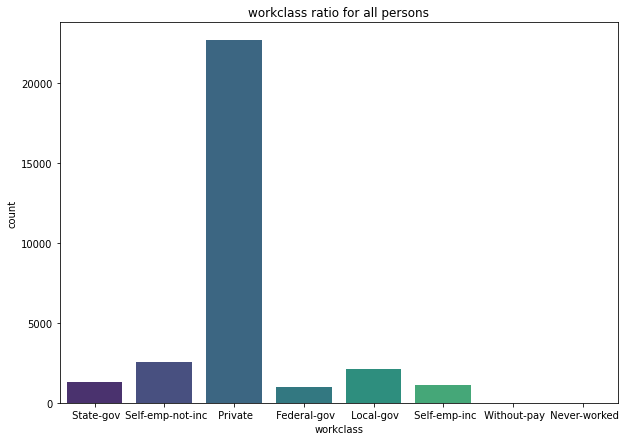

In [80]:
#A plot that displays the distribution of workclass for all persons in the dataset.
plt.figure(figsize=(10,7))
ax = sns.countplot( x=df.workclass , data= df , palette='viridis')
ax.set_title('workclass ratio for all persons')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

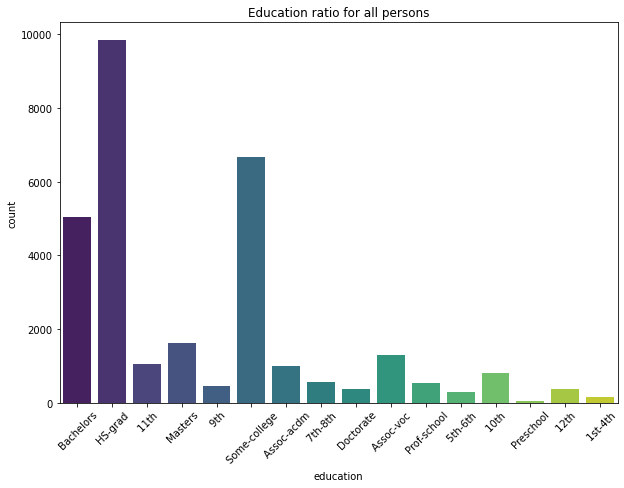

In [189]:
#A plot that displays the distribution of education for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df.education , data= df , palette='viridis')
ax.set_title('Education ratio for all persons')
plt.xticks(rotation=45)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

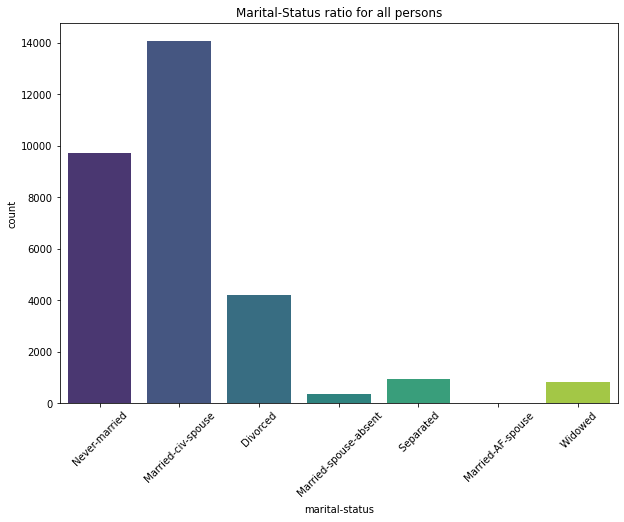

In [188]:
#A plot that displays the distribution of marital-status for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['marital-status'] , data= df , palette='viridis')
ax.set_title('Marital-Status ratio for all persons')
plt.xticks(rotation=45)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

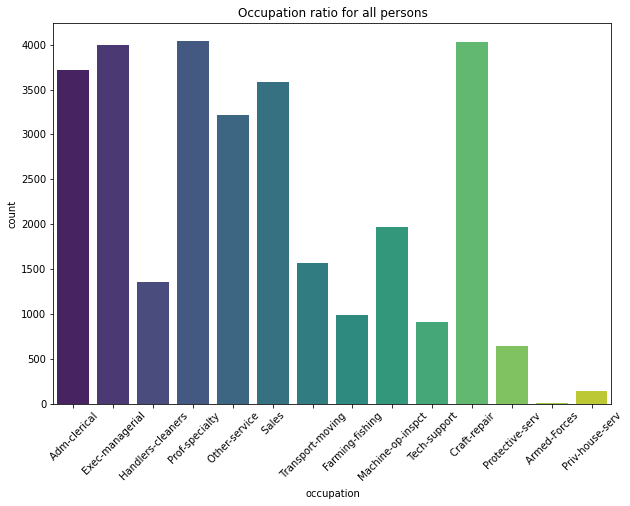

In [187]:
#A plot that displays the distribution of occupation for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['occupation'] , data= df , palette='viridis')
ax.set_title('Occupation ratio for all persons')
plt.xticks(rotation=45)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

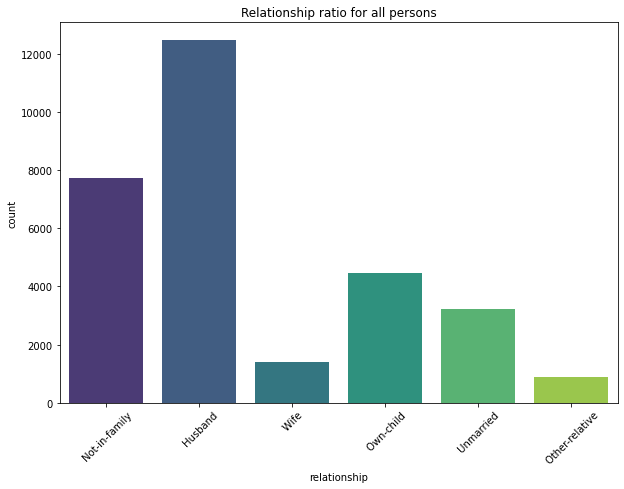

In [186]:
#A plot that displays the distribution of relationship for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['relationship'] , data= df , palette='viridis')
ax.set_title('Relationship ratio for all persons')
plt.xticks(rotation=45)
plt.tight_layout

Text(0.5, 1.0, 'Sex ratio for all persons')

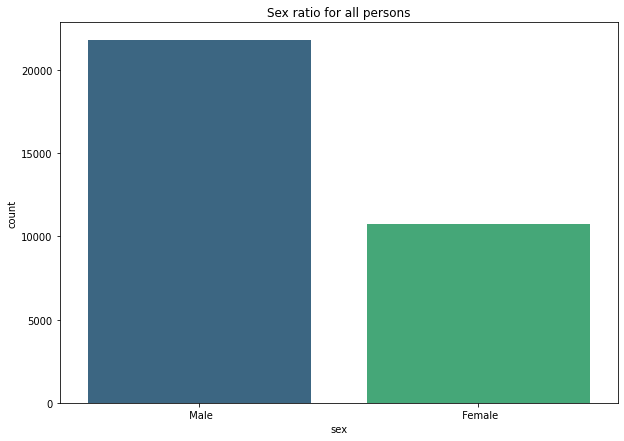

In [103]:
#A plot that displays the distribution of sex for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['sex'] , data= df , palette='viridis')
ax.set_title('Sex ratio for all persons')

Text(0.5, 1.0, 'Race ratio for all persons')

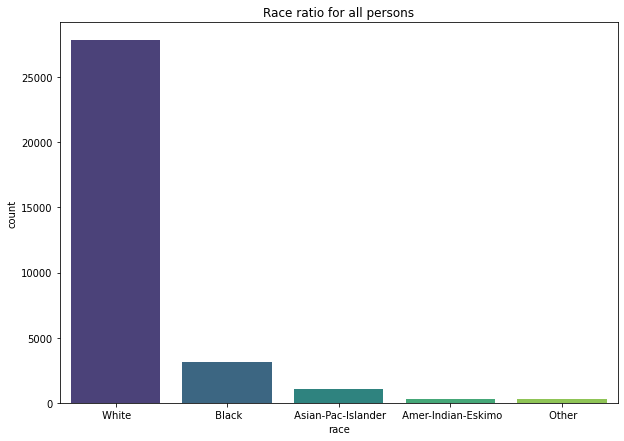

In [102]:
#A plot that displays the distribution of race for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['race'] , data= df , palette='viridis')
ax.set_title('Race ratio for all persons')

Text(0.5, 1.0, 'Country ratio for all persons')

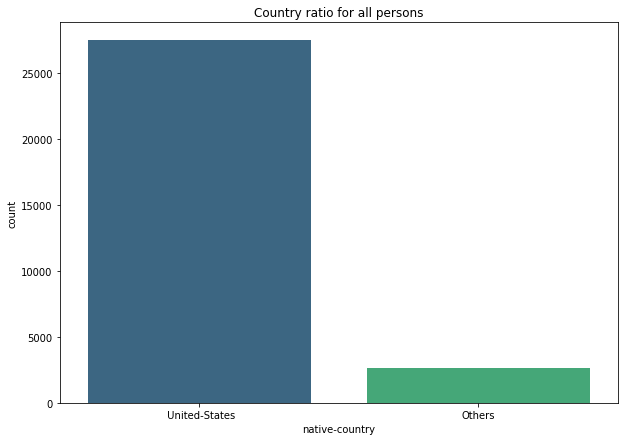

In [253]:
# Replacing all values in the "native-country" column that are not "United-States" with the string "Others".

for i in df['native-country'] :
    if i != ' United-States':
        df['native-country'].replace([i] , 'Others' , inplace = True)
        
#a plot that displays the distribution of countries for all persons in the dataset.

plt.figure(figsize=(10,7))
ax = sns.countplot( x=df['native-country'] , data= df , palette='viridis')
ax.set_title('Country ratio for all persons')

##**Step 9: Finding descriptive statistics to understand the central tendency and spread of the data**

In [45]:
df.describe()

,sl_no,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##**Step 10: Finding missing values**

In [210]:
df.isna().sum() #displaying missing values in every feature

sl_no                0
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

#**Actions taken for data cleaning and feature engineering**

##**Step 1: Finding any outliers or anomalies in the data**

Text(0.5, 1.0, 'Age Outliers')

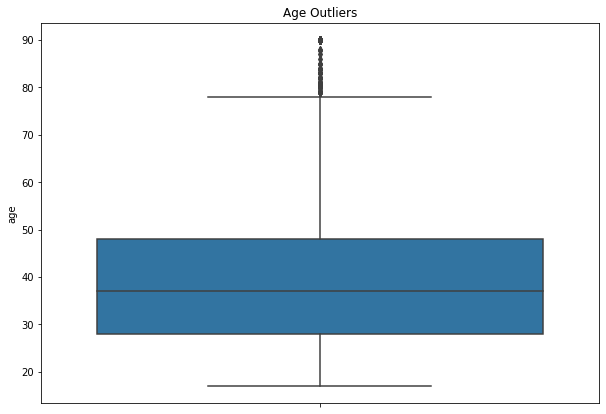

In [118]:
#The plot displays the distribution of ages in the dataset, with any outliers shown as individual points.
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y="age")
plt.title('Age Outliers')

Text(0.5, 1.0, 'fnlwgt Outliers')

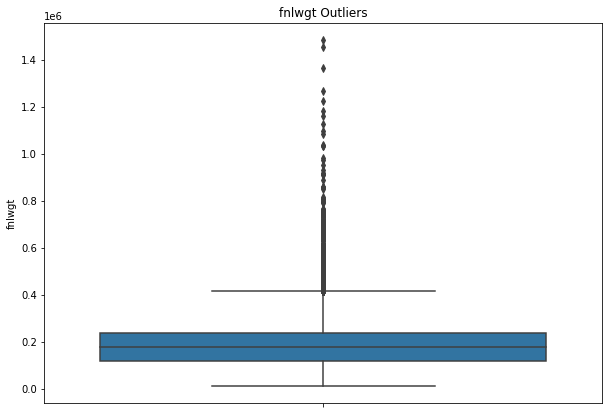

In [117]:
#The plot displays the distribution of fnlwgt in the dataset, with any outliers shown as individual points.
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y="fnlwgt")
plt.title('fnlwgt Outliers')

Text(0.5, 1.0, 'education-num Outliers')

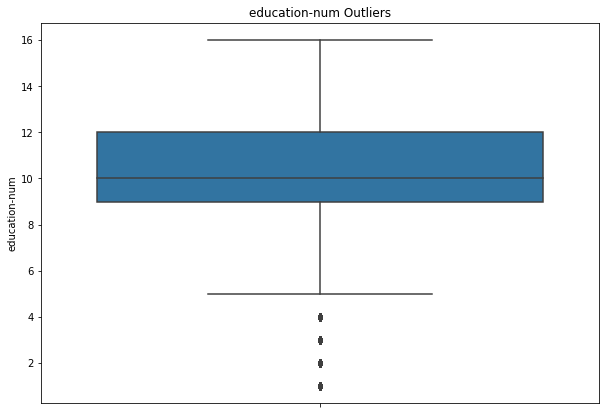

In [119]:
#The plot displays the distribution of education-num in the dataset, with any outliers shown as individual points.
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y="education-num")
plt.title('education-num Outliers')

Text(0.5, 1.0, 'capital-gain Outliers')

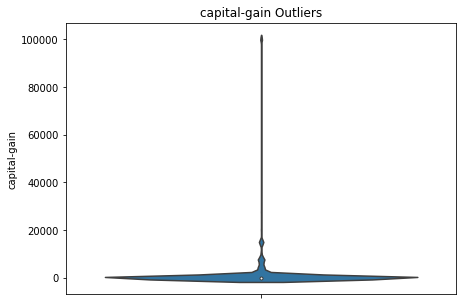

In [142]:
#The plot displays the distribution of capital-gain in the dataset, with any outliers shown as individual points.
plt.figure(figsize=(7,5))
sns.violinplot(data=df, y="capital-gain")
plt.title('capital-gain Outliers')

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'capital-loss Outliers')

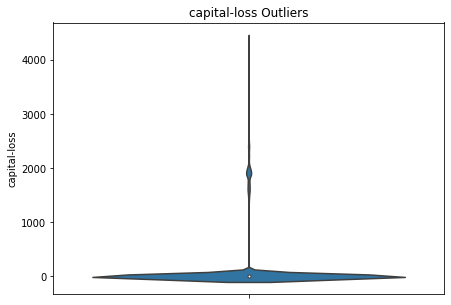

In [141]:
#The plot displays the distribution of capital-loss in the dataset, with any outliers shown as individual points.

plt.figure(figsize=(7,5))
sns.violinplot(data=df, y="capital-loss", orient="h")
plt.title('capital-loss Outliers')

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Hours Per Week Outliers')

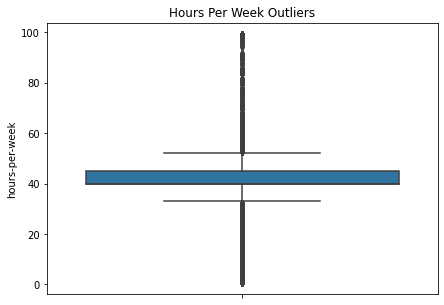

In [144]:
#The plot displays the distribution of hours-per-week in the dataset, with any outliers shown as individual points.

plt.figure(figsize=(7,5))
sns.boxplot(data=df, y="hours-per-week", orient="h")
plt.title('Hours Per Week Outliers')

##**Step 2: Handle missing values by imputing or removing the observations, if necessary**
Use dropna() method to drop all the rows, it it has any na value


In [211]:
df.shape #displaying rows and columns in dataset

(32561, 16)

In [236]:
df.dropna(inplace=True) #deleting all rows, where any value in nan/null.
df.shape

(30162, 16)

In [215]:
df #dipslaying dataset after deleting null values.

,sl_no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##**Step 3: Convert categorical variables into numerical variables using one-hot encoding or label encoding**

In [243]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [244]:
df['sex'] = encoder.fit_transform(df['sex']) #converting Sex feature into 0/1. 1 for male. 0 is for female.
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,<=50K


##**Step 4: Normalize the features to ensure that the features are on the same scale**
In normalization, all Numeric values lie within the same range (between 0 and 1)
There is no need to normailze this dataset.

##**Step 5: Create new features by combining existing features, if necessary.**

The dataset does not contain the necessary features to create a new feature.

##**Step 6: Remove any irrelevant or redundant features.**

In [239]:
df.drop(columns=['sl_no'],axis=1,inplace=True) #removing sl_no feature, because it has no effect on the salary

In [240]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,<=50K


##**Step 7: Visualization of data to find the relationship with different features**



<AxesSubplot:>

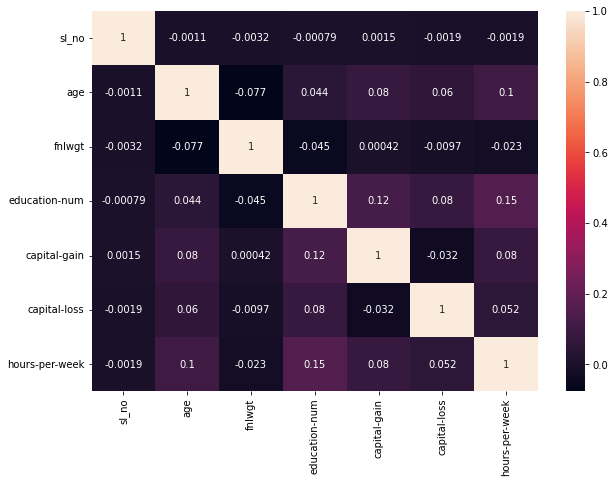

In [168]:
plt.figure(figsize=(10,7)) #displaying correlation of variables with eachother
sns.heatmap(df.corr() , annot=True)

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

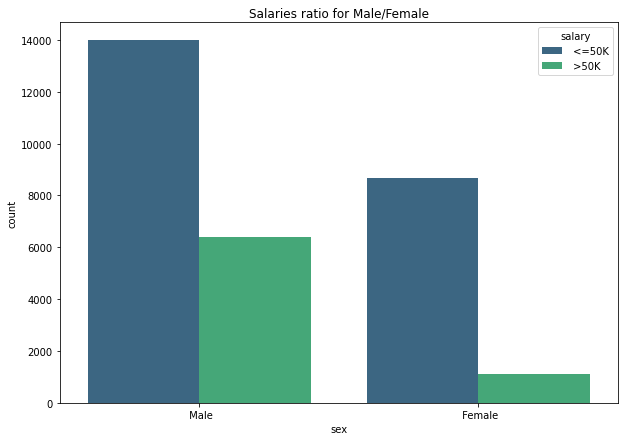

In [170]:
#The plot displays the ratio of salaries for males and females in the dataset.
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio for Male/Female')


Text(0.5, 1.0, 'Salaries ratio for workclass')

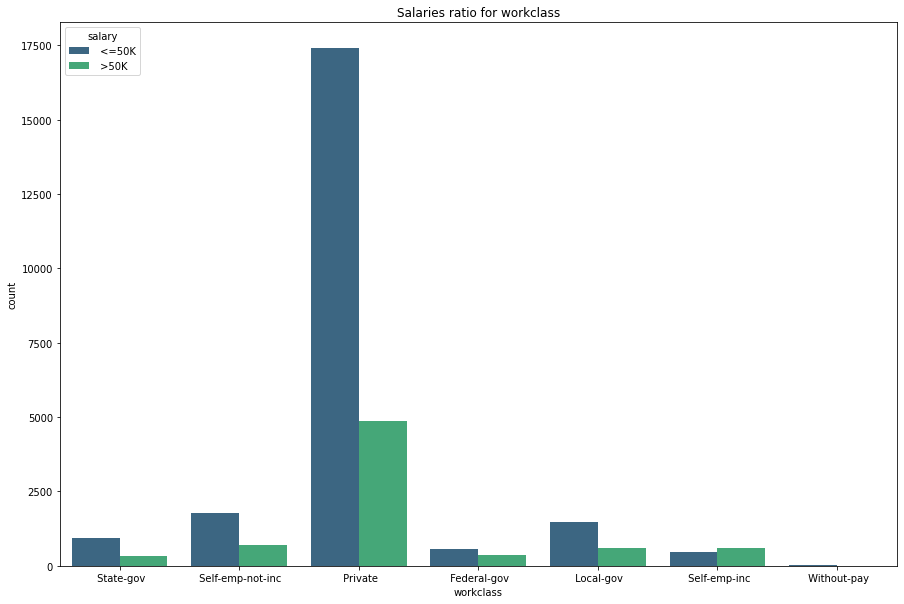

In [171]:
#The plot displays the ratio of salaries for workclass in the dataset.

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='workclass', hue='salary', palette='viridis').set_title('Salaries ratio for workclass')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

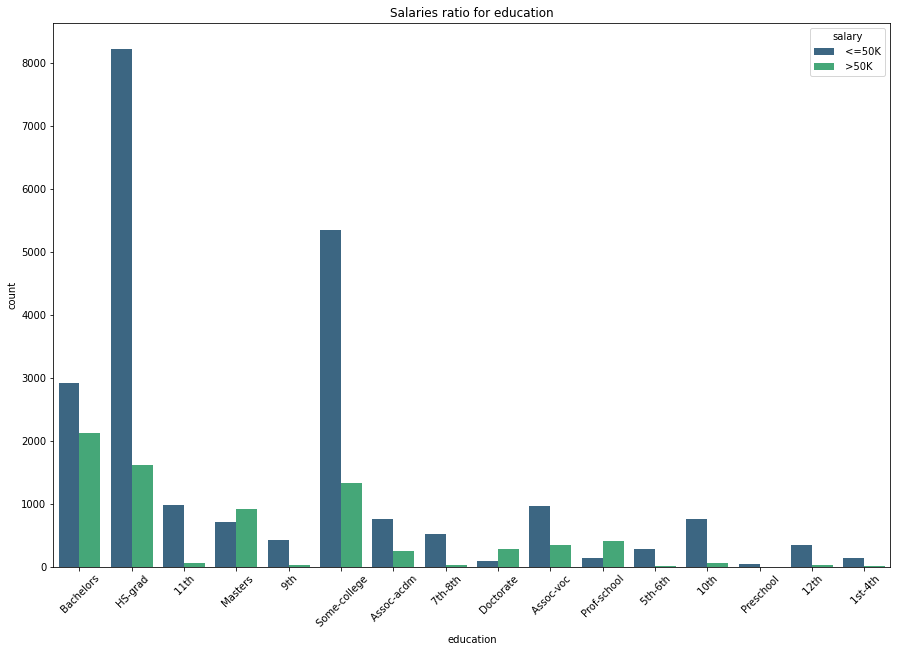

In [246]:
#Now let's compare typical education of people who make high salary vs people who make lower salary and see if there is a difference.

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='education', hue='salary', palette='viridis').set_title('Salaries ratio for education')
plt.xticks(rotation=45)
plt.tight_layout


Text(0.5, 1.0, 'Salaries ratio for Marital Status')

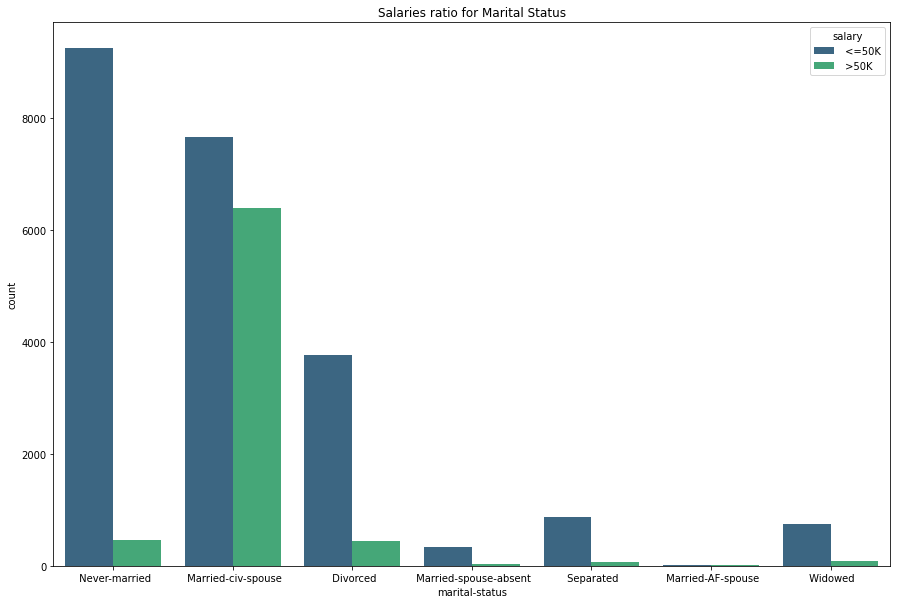

In [174]:
#The graph displays the ratio of salaries for different marital-status.

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='marital-status', hue='salary', palette='viridis').set_title('Salaries ratio for Marital Status')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

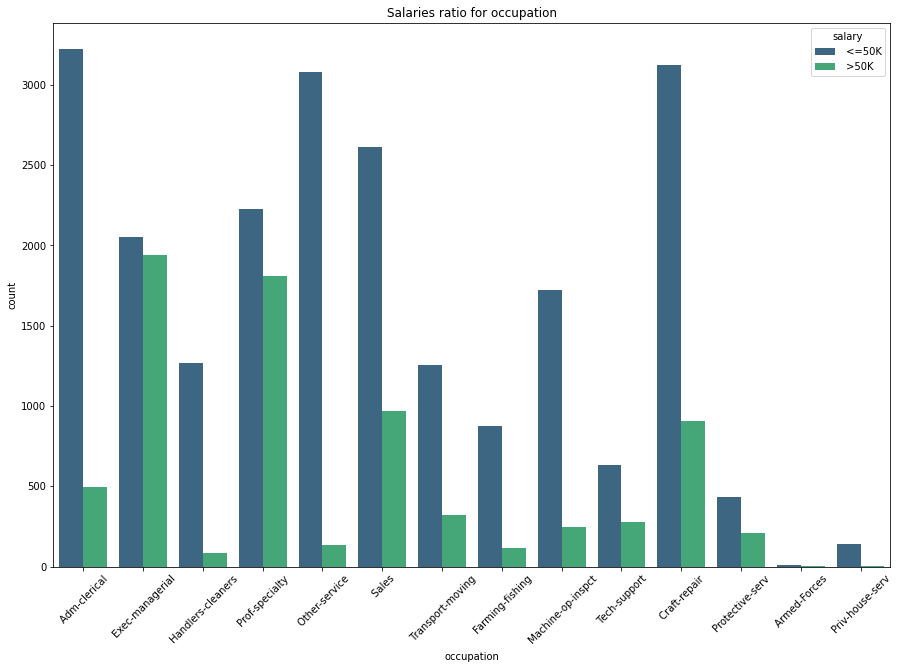

In [184]:
#The graph displays the ratio of salaries for different occupation.

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='occupation', hue='salary', palette='viridis').set_title('Salaries ratio for occupation')
plt.xticks(rotation=45)
plt.tight_layout

Text(0.5, 1.0, 'Salaries ratio for Relationship')

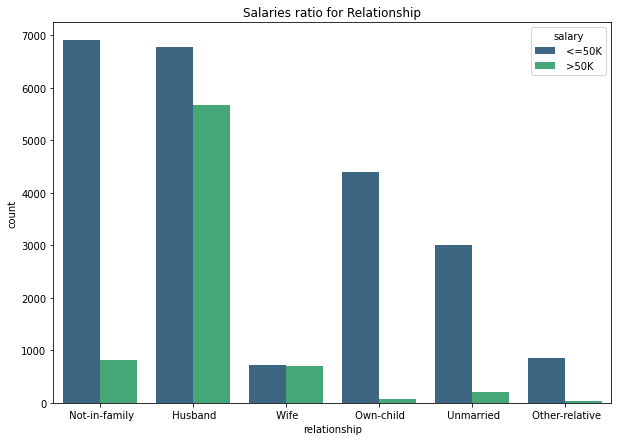

In [190]:
#The graph displays the ratio of salaries for different relationships.
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='relationship', hue='salary', palette='viridis').set_title('Salaries ratio for Relationship')


Text(0.5, 1.0, 'Salaries ratio for Race')

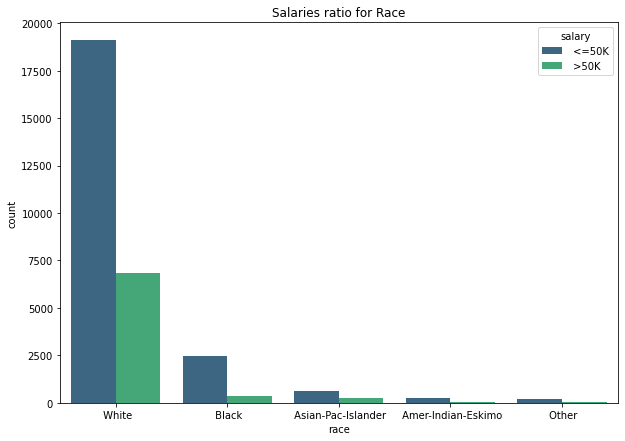

In [181]:
#The plot displays the ratio of salaries for different races.
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='race', hue='salary', palette='viridis').set_title('Salaries ratio for Race')

Text(0.5, 1.0, 'Salaries ratio for Sex')

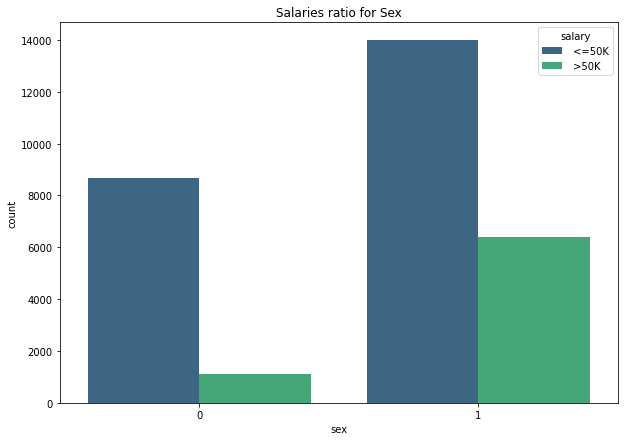

In [226]:
#The plot displays the ratio of salaries for different sexes.
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio for Sex') #1 is for male, 0 is for female

Text(0.5, 1.0, 'Salaries ratio for Native-country')

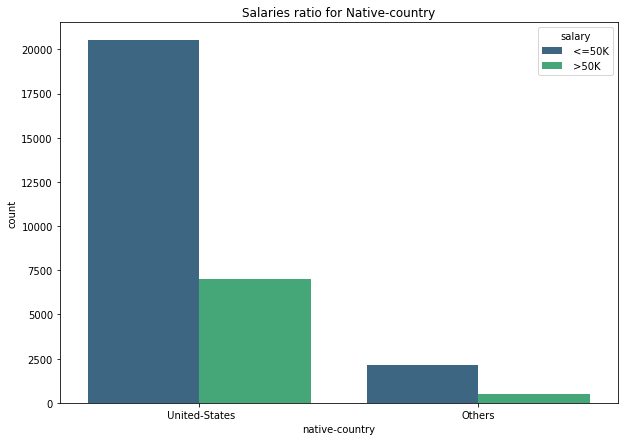

In [255]:
#The plot displays the ratio of salaries for different native countries.
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='native-country', hue='salary', palette='viridis').set_title('Salaries ratio for Native-country')

##**Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner**

1. Mostly every person having salary less than 50K have less capital gain than person having salary greater than 50k.
3. Almost all executive managers and armed force person has salary above 50k obviously. 
4. There are more number of peoples having salary higher than 50k are White.
5. Most of the data is from Male.
6. It can be seen that large number of married peoples have salary higher than 50k.
7. Data is more concentraed for people living in US.



##**Formulating at least 3 hypotheses about this data**

1. There are more number of peoples having salary higher than 50k in age range of 38 - 48
2. Almost every person having education as Bachelor / Masters / Doctorate have their salary greater than 50k
3. Only in Self-emp-inc the number of >=50k income is higher than <50k income.



##**Conducting a formal significance test for one of the hypotheses and discuss the results**
---
There are more number of peoples having salary higher than 50k in age range of 38 - 48

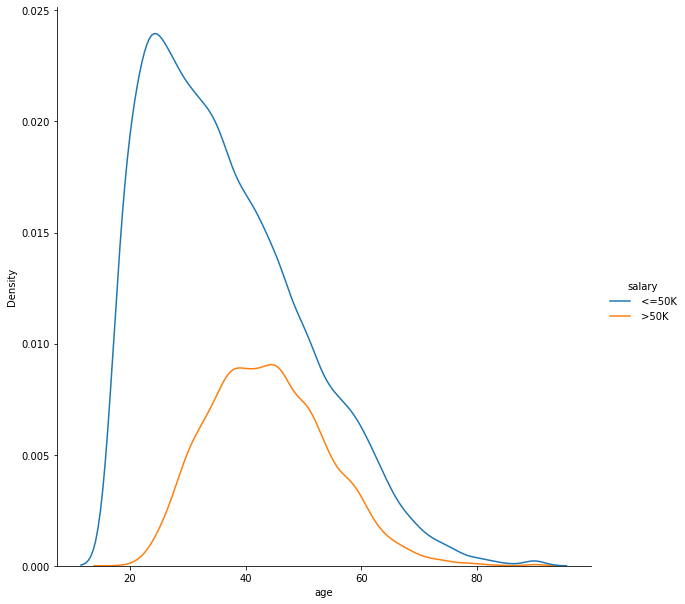

In [250]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=8.5, aspect=1)

In the graph we can see people having salary more than 50k lies between age 38 to 48

##**Suggestions for next steps in analyzing this data**


1. **Years of Industry Experience:** The number of years of experience in the industry should be the part of the dataset.
2. **Company Revenue:** The revenue of the company where the employee is working should be the part of the dataset.
3. **Relevant Work Experience:** The amount of relevant work experience of the employee in the industry should be the part of the dataset.



#**A paragraph that summarizes the quality of this data set and a request for additional data if needed**

1. The correlation analysis has been performed, and the result suggests that there is no strong correlation between the variables in the dataset.
2. The categorical variables have been analyzed, and the result suggests that most of the data in the dataset belongs to the "male" category. This suggests that the dataset may be biased towards men. And the majority of the data in the dataset is from the United States.
3. A pattern has been observed in the dataset being analyzed, specifically that almost every person with education levels of Bachelor's, Master's, or Doctorate has a salary greater than 50k.
4. A comparison has been made between the categorical variables, specifically gender, and the target variable, which is salary. The comparison shows that only a few women in the dataset have a salary greater than 50k. And employees with higher levels of education are more likely to have a salary greater than 50k.
5. A pattern has been observed in the dataset being analyzed, specifically that a large number of married people have a salary greater than 50k.
6. Dataset has a variable called "workclass", and that the majority of the data in this variable belongs to the "private" category. There should be more data for the other categories in this variable.